In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")

In [ ]:
seq_length = 20
n_samples = 5000

# Generate time steps
t = np.arange(n_samples + seq_length)

data = (
    np.sin(0.2 * t) +
    0.5 * np.sin(0.05 * t) +
    0.1 * (np.sin(0.1 * t) ** 2) +
    0.75 * (np.sin(0.25 * t))
    #0.1 * np.random.randn(len(t))
)

X = []
y = []
for i in range(n_samples):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
X = np.array(X)
y = np.array(y)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

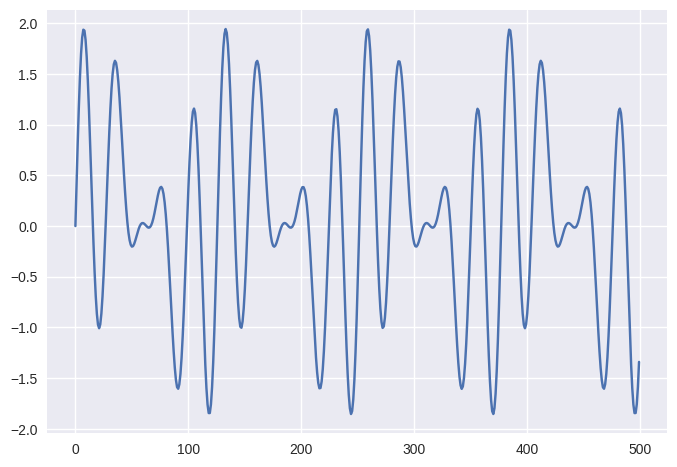

In [ ]:
#plt.plot(y[0:500], label='True')
plt.plot(X[0:500,0], label='True')
#plt.plot(X[0:500,1], label='True')

In [ ]:
# Define a simple linear model
class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 5)
        self.linear2 = nn.Linear(5, 1)
    def forward(self, x):
        return self.linear2(self.linear1(x))

In [ ]:
model =LinearModel(seq_length)
criterion =nn.MSELoss()
optimizer =torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train loop
model.train()
for epoch in range(20):
    optimizer.zero_grad()
    output=model(X_tensor)
    loss=criterion(output, y_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 2 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 1.0463
Epoch 2, Loss: 0.7065
Epoch 4, Loss: 0.4845
Epoch 6, Loss: 0.3604
Epoch 8, Loss: 0.3155
Epoch 10, Loss: 0.3075
Epoch 12, Loss: 0.2869
Epoch 14, Loss: 0.2417
Epoch 16, Loss: 0.1913
Epoch 18, Loss: 0.1532


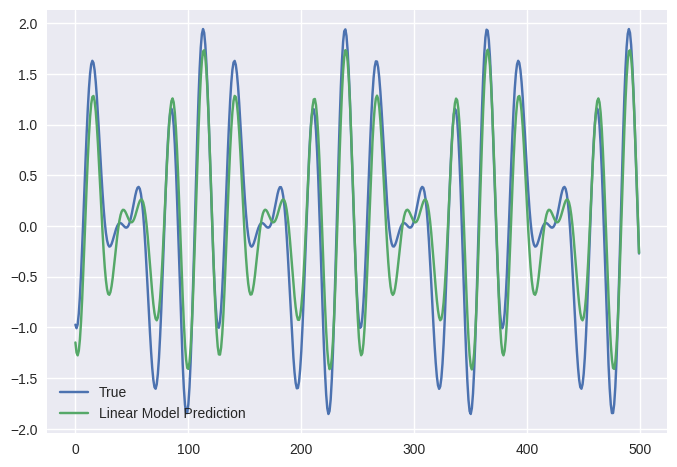

In [ ]:
preds = model(X_tensor).detach().numpy()
plt.plot(y[0:500], label='True')
plt.plot(preds[0:500], label='Linear Model Prediction')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, X , y_true):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred = model(X)
        y_pred_np = y_pred.cpu().numpy()
        y_true_np = y_true.cpu().numpy()

        mse = np.mean((y_true_np - y_pred_np) ** 2)
        mae = np.mean(np.abs(y_true_np - y_pred_np))
        rmse = np.sqrt(mse)

    print(f"Evaluation Results:\nMSE: {mse:.6f}\nMAE: {mae:.6f}\nRMSE: {rmse:.6f}")
    return mse, mae, rmse

In [ ]:
evaluate_model(model,X_tensor,y_tensor)

Evaluation Results:
MSE: 0.130014
MAE: 0.295455
RMSE: 0.360575


(np.float32(0.1300143), np.float32(0.29545465), np.float32(0.36057496))

In [ ]:
class SimpleRNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
print(np.shape(X_tensor.unsqueeze(-1)))

torch.Size([5000, 20, 1])


In [ ]:
# Prepare data for RNN: (batch, seq, feature)
X_rnn = X_tensor.unsqueeze(-1)
model_rnn = SimpleRNNModel(1, 16)
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.01)

In [ ]:
model_rnn.train()
for epoch in range(20):

  optimizer.zero_grad()
  output=model_rnn(X_rnn)
  loss=criterion(output, y_tensor)
  loss.backward()
  optimizer.step()


  if epoch % 2 == 0:
      print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 0.7598
Epoch 2, Loss: 0.4882
Epoch 4, Loss: 0.2940
Epoch 6, Loss: 0.2346
Epoch 8, Loss: 0.1553
Epoch 10, Loss: 0.0975
Epoch 12, Loss: 0.0652
Epoch 14, Loss: 0.0460
Epoch 16, Loss: 0.0294
Epoch 18, Loss: 0.0199


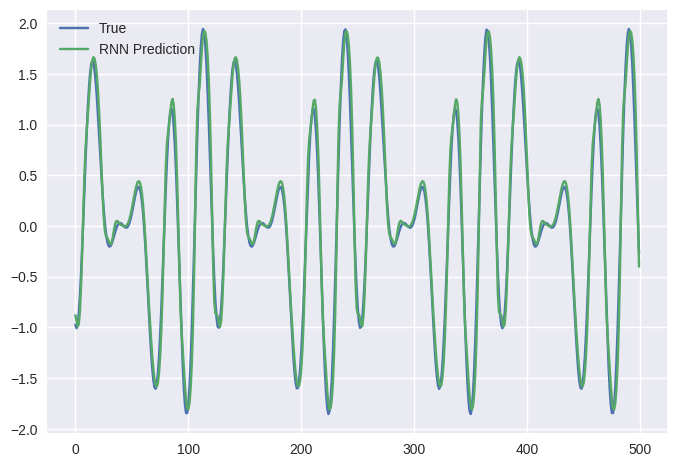

In [ ]:
preds_rnn = model_rnn(X_rnn).detach().numpy()
plt.plot(y[0:500], label='True')
plt.plot(preds_rnn[0:500], label='RNN Prediction')
plt.legend()
plt.show()

In [ ]:
evaluate_model(model_rnn,X_rnn,y_tensor )

Evaluation Results:
MSE: 0.018405
MAE: 0.103289
RMSE: 0.135664


(np.float32(0.018404754), np.float32(0.103288695), np.float32(0.13566412))

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model_lstm = LSTMModel(1, 16)
optimizer = optim.Adam(model_lstm.parameters(), lr=0.01)

In [ ]:
model_lstm.train()
for epoch in range(20):

  optimizer.zero_grad()
  output=model_lstm(X_rnn)
  loss=criterion(output, y_tensor)
  loss.backward()
  optimizer.step()


  if epoch % 2 == 0:
      print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 1.0234
Epoch 2, Loss: 0.8717
Epoch 4, Loss: 0.7633
Epoch 6, Loss: 0.6760
Epoch 8, Loss: 0.5985
Epoch 10, Loss: 0.5123
Epoch 12, Loss: 0.4086
Epoch 14, Loss: 0.3029
Epoch 16, Loss: 0.2029
Epoch 18, Loss: 0.1118


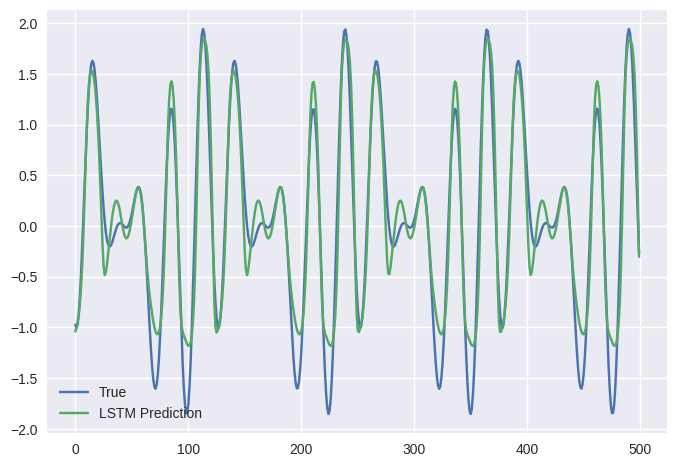

In [ ]:
preds_lstm = model_lstm(X_rnn).detach().numpy()
plt.plot(y[0:500], label='True')
plt.plot(preds_lstm[0:500], label='LSTM Prediction')
plt.legend()
plt.show()

In [ ]:
evaluate_model(model_lstm, X_rnn,y_tensor)

Evaluation Results:
MSE: 0.073003
MAE: 0.202662
RMSE: 0.270191


(np.float32(0.07300308), np.float32(0.20266227), np.float32(0.27019083))

In [ ]:
#Exercise : implement simple GRU, train and plot the results.

In [ ]:
# # Stock Price Prediction with Linear and RNN Models
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

torch.manual_seed(42)
np.random.seed(42)

[*********************100%***********************]  1 of 1 completed


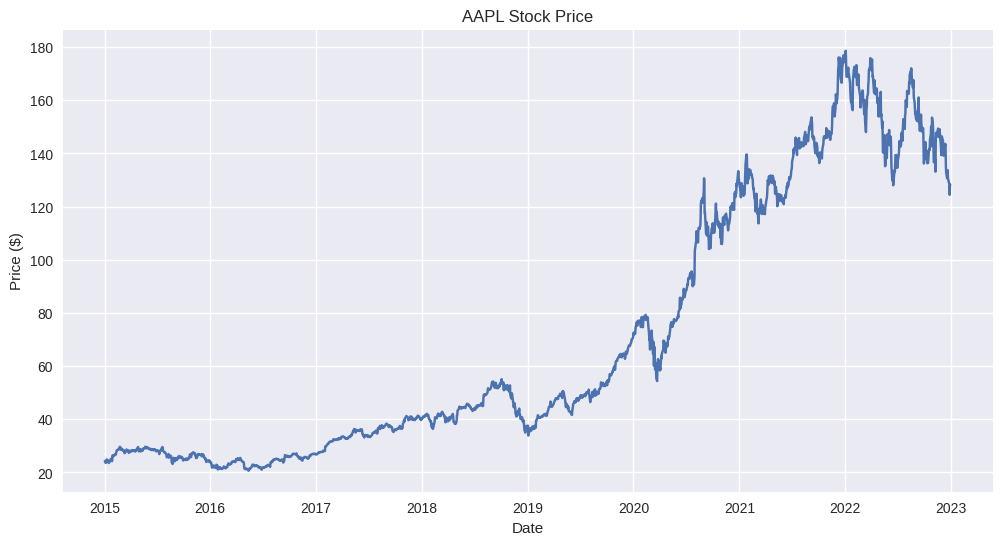

In [ ]:
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']  # We'll use closing prices

# Let's use Apple stock as an example
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-01-01'
stock_prices = download_stock_data(ticker, start_date, end_date)


plt.figure(figsize=(12, 6))
plt.plot(stock_prices)
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# %%
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(stock_prices.values.reshape(-1, 1))

In [ ]:
np.shape(stock_prices)

(2014, 1)

In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# Set sequence length (how many days to look back)
SEQ_LENGTH = 20

X, y = create_sequences(scaled_prices, SEQ_LENGTH)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Create PyTorch datasets
class StockDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

# Create data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
# Linear Model


class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 5)
        self.linear2 = nn.Linear(5, 1)

    def forward(self, x):
        # Flatten the sequence dimension
        x = x.view(x.size(0), -1)  # (batch_size, seq_length * features)
        return self.linear2(self.linear1(x))


linear_model = LinearModel(SEQ_LENGTH)


# RNN Model


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).requires_grad_()
        out, _ = self.rnn(x, h0.detach())
        out = self.fc(out[:, -1, :])
        return out

# Initialize RNN model
rnn_model = RNNModel(input_size=1, hidden_size=32)
print(rnn_model)

RNNModel(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
criterion = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=100, learning_rate=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(epochs), desc="Training"):
        model.train()
        epoch_train_loss = 0
        for batch_x, batch_y in train_loader:
          optimizer.zero_grad()

          outputs = model(batch_x)
          loss = criterion(outputs, batch_y)
          loss.backward()
          optimizer.step()
          epoch_train_loss += loss.item()

        # Average training loss for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation
        model.eval()
        epoch_test_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                epoch_test_loss += loss.item()

        test_losses.append(epoch_test_loss / len(test_loader))

    return train_losses, test_losses

In [ ]:
linear_train_loss, linear_test_loss = train_model(linear_model, train_loader, test_loader, epochs=50)

Training: 100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


In [ ]:
rnn_train_loss, rnn_test_loss = train_model(rnn_model, train_loader, test_loader, epochs=50)

Training: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


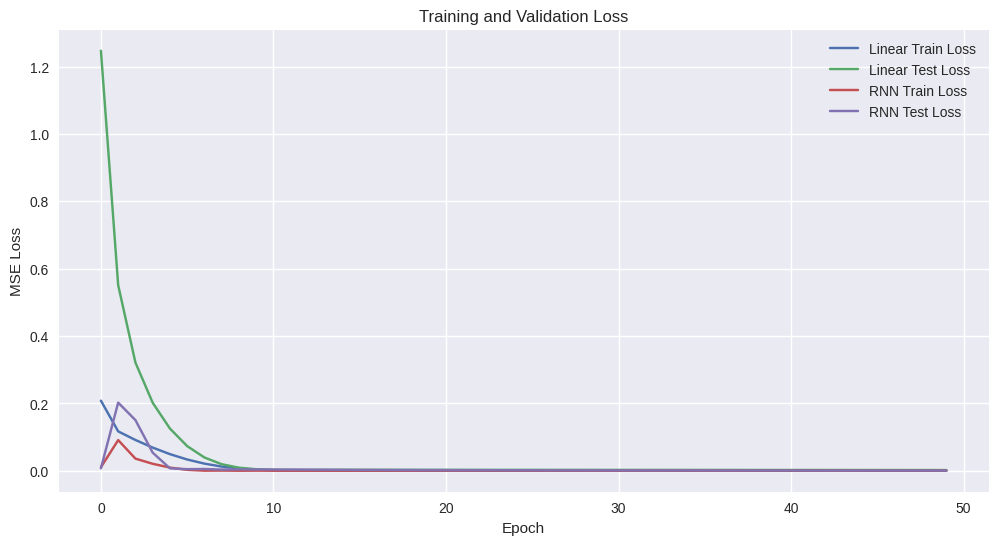

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(linear_train_loss, label='Linear Train Loss')
plt.plot(linear_test_loss, label='Linear Test Loss')
plt.plot(rnn_train_loss, label='RNN Train Loss')
plt.plot(rnn_test_loss, label='RNN Test Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def make_predictions(model, data_loader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch_x, batch_y in data_loader:
            outputs = model(batch_x)
            predictions.extend(outputs.squeeze().tolist())
            actuals.extend(batch_y.squeeze().tolist())

    return np.array(predictions), np.array(actuals)

# Get predictions
linear_preds, linear_actuals = make_predictions(linear_model, test_loader)
rnn_preds, rnn_actuals = make_predictions(rnn_model, test_loader)

# Inverse transform to original scale
linear_preds = scaler.inverse_transform(linear_preds.reshape(-1, 1))
linear_actuals = scaler.inverse_transform(linear_actuals.reshape(-1, 1))
rnn_preds = scaler.inverse_transform(rnn_preds.reshape(-1, 1))
rnn_actuals = scaler.inverse_transform(rnn_actuals.reshape(-1, 1))




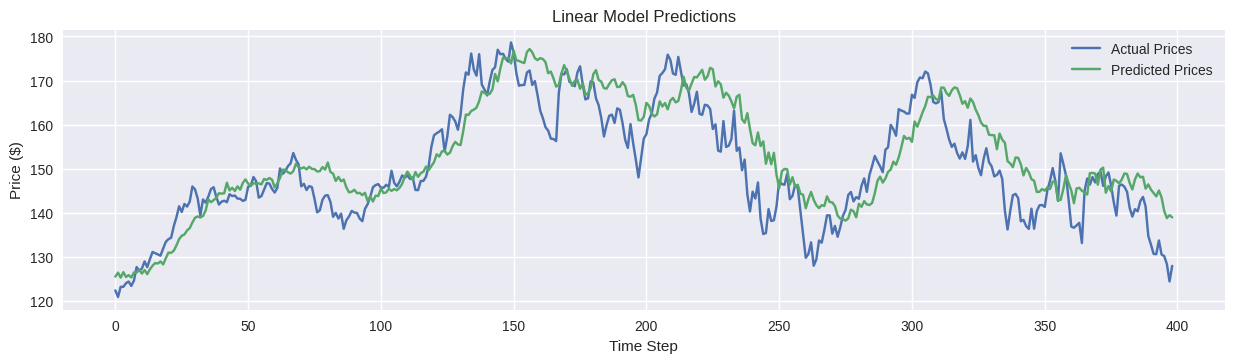

In [ ]:

plt.figure(figsize=(15, 8))

# Linear model results
plt.subplot(2, 1, 1)
plt.plot(linear_actuals, label='Actual Prices')
plt.plot(linear_preds, label='Predicted Prices')
plt.title('Linear Model Predictions')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

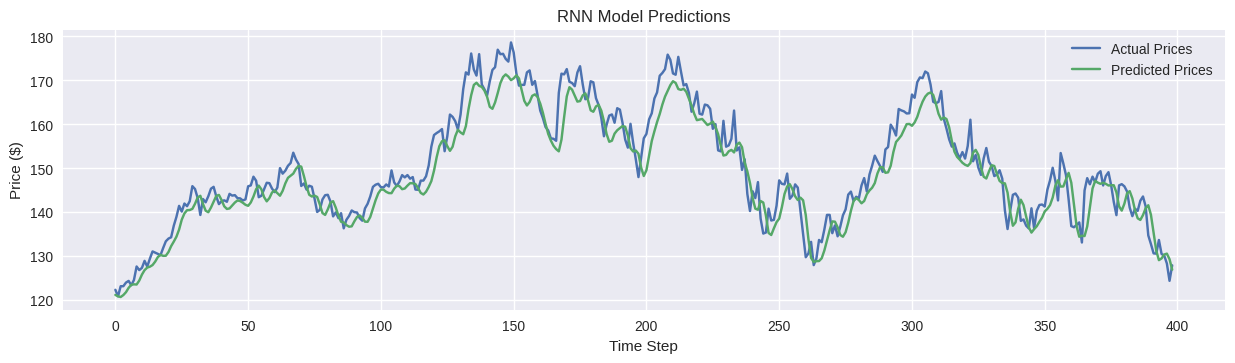

In [ ]:
plt.figure(figsize=(15, 8))

# RNN model results
plt.subplot(2, 1, 2)
plt.plot(rnn_actuals, label='Actual Prices')
plt.plot(rnn_preds, label='Predicted Prices')
plt.title('RNN Model Predictions')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
#Exercise : implement simple LSTM with hidden dimension 32 and train it on yfinance data.